In [1]:
from core.lottery import *
from pid.pid_base import *
import os

IndentationError: expected an indented block after 'elif' statement on line 81 (strategy.py, line 83)

# controller gains search space simulation.  

crawler converges fast towrds highest accuracy, here is how it works:
## for all controller N pramaters:
* start with some hueristic state $s_i | 0 < i <= N$ 
* look on the right, and left of s at random, within certain dynamic range, and step size that are changed every loop to either zoom in/out to converge fast as possible, and avoid getting stuck in local minima/maxima.
* if new record is hit, or range is exhusted, move to new next controller parameter/dimension state $s_{i+1}$.
* if a loop went by without hitting any new record (high controller accuracy), search space is scrutinized with smaller step, and larger space around $s_i$ in next round.
* otherwise space range is decreased, and step is increased.

## auto crawler discrete controller

In [ ]:
!python auto_crawler.py

In [ ]:
!cat highest_gain.txt 

## auto crawler hakahashi controller

In [ ]:
!python auto_crawler_takahashi.py

In [ ]:
!cat highest_gain_takahashi.txt

# controller parameters results


the controller results shows that optimal gains are as follows: accuracy:0.7568862275449102, kp: -0.03999999999998902, ki:-0.005999999985257798, kd:0.01299999999999478


In [ ]:
def vesting_instance(kp, ki, kd, initial_distribution, vesting):
    os.system("rm f.hist; rm leads.hist")
    RUNNING_TIME = len(next(iter(vesting.values())))*28800

    if __name__ == "__main__":
        darkies = []
        id = 0
        for name, distrib in vesting.items():
            darkies += [Darkie(initial_distribution[id], vesting=distrib)]
            id+=1
        airdrop = 0
        for darkie in darkies:
            airdrop+=darkie.stake
        print("network airdrop: {} on {} nodes".format(airdrop, len(darkies)))
        dt = DarkfiTable(airdrop, RUNNING_TIME)
        for darkie in darkies:
            dt.add_darkie(darkie)
        dt.background(rand_running_time=False)
        dt.write()

# run lottery instance

In [2]:
def draw():
    LEAD_FILE = "leads.hist"
    F_FILE = "f.hist"

    LEAD_PROCESSED_IMG = "lead_history_processed.png"
    F_PROCESSED_IMG = "f_history_processed.png"

    SEP = ","
    NODES = 5 # nuber of nodes logged

    with open(LEAD_FILE) as f:
        buf = f.read()
        nodes = buf.split(SEP)[:-1]
        node_log = []
        for i in range(0, len(nodes)):
            node_log+=[int(nodes[i])]
        freq_single_lead = sum(np.array(node_log)==1)/float(len(node_log))
        print("single leader frequency: {}".format(freq_single_lead))
        plt.plot(node_log)
        plt.legend(['#leads'])
        plt.savefig(LEAD_PROCESSED_IMG)


    with open(F_FILE) as f:
        buf = f.read()
        nodes = buf.split(SEP)[:-1]
        node_log = []
        for i in range(0, len(nodes)):
            node_log+=[float(nodes[i])]
        plt.plot(node_log)
        plt.legend(['#leads', 'f'])
        plt.savefig(F_PROCESSED_IMG)

In [ ]:
vesting = {}
with open('vested_distribution.csv') as f:
    for node  in f.readlines():
        keyval = node.split(',')
        key = keyval[0]
        val = ','.join(keyval[1:])
        vesting[keyval[0]] = eval(eval(val))

In [ ]:
nodes = len(vesting)
# stakers intial distribution
genesis_distribution = [1 for _ in range(nodes)]
# using simulation output
kp=-0.03999999999998902
ki=-0.005999999985257798
kd=0.01299999999999478
vesting_instance(kp, ki, kd,  genesis_distribution, vesting)
draw()

# randomize token in stake

In [44]:
def vesting_instance(kp, ki, kd, initial_distribution):
    os.system("rm f.hist; rm leads.hist")
    RUNNING_TIME = len(initial_distribution)

    if __name__ == "__main__":
        darkies = [Darkie(initial_distribution[id]) for id in range(RUNNING_TIME)]
        airdrop = sum(initial_distribution)
        for darkie in darkies:
            airdrop+=darkie.stake
        print("network airdrop: {} on {} nodes".format(airdrop, len(darkies)))
        dt = DarkfiTable(airdrop, RUNNING_TIME)
        for darkie in darkies:
            dt.add_darkie(darkie)
        dt.background(rand_running_time=False)
        dt.write()

network airdrop: 21337567126.04948 on 1000 nodes
single leader frequency: 0.07684630738522955


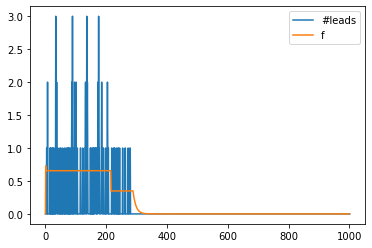

In [45]:
kp=-0.03999999999998902
ki=-0.005999999985257798
kd=0.01299999999999478
NODES=1000
genesis_distribution = [random.random()*ERC20DRK*0.01 for _ in range(NODES)]
vesting_instance(kp, ki, kd,  genesis_distribution)
draw()

#### 